In [70]:
import numpy as np
from matplotlib import pyplot as plt
np.set_printoptions(suppress=True)
import seaborn as sns
from math import sin
import time
from sklearn.metrics import mean_squared_error as mse
import pickle as pkl

In [68]:
trainData=np.genfromtxt('Dataset/problem4a_train.csv',delimiter=',')
testData=np.genfromtxt('Dataset/problem4a_test.csv',delimiter=',')
x_train=trainData[:,0]
y_train=trainData[:,1]
x_test=testData

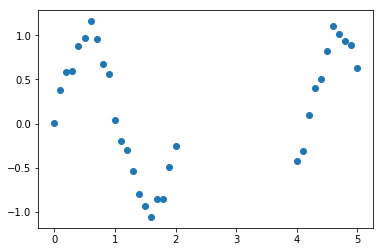

In [69]:
plt.scatter(x_train,y_train)
plt.show()

In [74]:
x_train=x_train.reshape(-1,1)
x_train.shape

(32, 1)

In [75]:
x_test=x_test.reshape(-1,1)
x_test.shape

(51, 1)

In [76]:
y_train.shape

(32,)

In [42]:
def get_y(x_test):
    
    y_test=np.sin(3*x_test)
    return y_test
y_test=get_y(x_test)
print(y_test.shape)

(51, 1)


In [7]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn.gaussian_process.kernels import RationalQuadratic as RQ
from sklearn.gaussian_process.kernels import ExpSineSquared as ESS

In [15]:
C1 = C(1.0, (1e-3, 1e3))
C2 = C(0.5, (1e-3, 1e3))
RBF1 = RBF(10, (1e-2, 1e2))
RBF2 = RBF(0.5, (1e-2, 1e2))
RQ1 = RQ(10, 0.5 ,(1e-2, 1e2))
ESS1 = ESS(1.0, 1.0, (1e-05, 100000.0), (1e-05, 100000.0))
kernel1 = C1 * RBF1 + C2
kernel2 = C1 * RBF1 + RBF2
kernel3 = C1 * RQ1 + RBF2
kernel4 = C1 * ESS1 + RBF2

In [16]:
gp = GaussianProcessRegressor(kernel=kernel1, alpha=0.5**5,n_restarts_optimizer=9)
gp.fit(x_train,y_train)

GaussianProcessRegressor(alpha=0.03125, copy_X_train=True,
             kernel=1**2 * RBF(length_scale=10) + RBF(length_scale=0.5),
             n_restarts_optimizer=9, normalize_y=False,
             optimizer='fmin_l_bfgs_b', random_state=None)

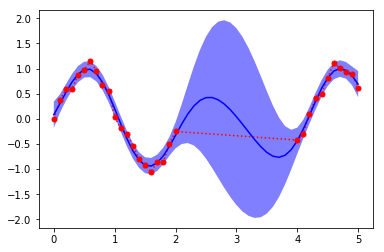

In [17]:
y_pred, sigma = gp.predict(x_test, return_std=True)
plt.plot(x_train, y_train, 'r:', label=r'$f(x) = sin(3x)$')
plt.errorbar(x_train.ravel(), y_train, 0, fmt='r.', markersize=10, label='Observations')
plt.plot(x_test, y_pred, 'b-', label='Prediction')
plt.fill(np.concatenate([x_test, x_test[::-1]]),
             np.concatenate([y_pred - 1.95 * sigma,
                            (y_pred + 1.95 * sigma)[::-1]]),
             alpha=.5, fc='b', ec='None', label='95% confidence interval')
plt.show()

In [113]:
GP = []
for ndx, kernel in zip([1,2,3,4], [kernel1, kernel2, kernel3, kernel4]):
    t = time.time()
    print('---------------------------------------------------------------------------')
    print(f'time - {t} :: Fitting GP for kernel - {ndx}')
    gp = GaussianProcessRegressor(kernel=kernel, alpha=0.5 ** 5,
                              n_restarts_optimizer=10)
    gp.fit(x_train, y_train)
    with open( f"Dataset/GP_for_Kernel_Sin3x_{ndx}.pkl", "wb" ) as f:
        pkl.dump(gp, f)
    GP.append(gp)
    print(f'GP for Kernel - {ndx} Finished :: Elapsed Time - {time.time()-t}')
    print('---------------------------------------------------------------------------')

---------------------------------------------------------------------------
time - 1571170141.8838015 :: Fitting GP for kernel - 1
GP for Kernel - 1 Finished :: Elapsed Time - 0.28497910499572754
---------------------------------------------------------------------------
---------------------------------------------------------------------------
time - 1571170142.1688473 :: Fitting GP for kernel - 2
GP for Kernel - 2 Finished :: Elapsed Time - 0.29302382469177246
---------------------------------------------------------------------------
---------------------------------------------------------------------------
time - 1571170142.4619412 :: Fitting GP for kernel - 3
GP for Kernel - 3 Finished :: Elapsed Time - 0.48460912704467773
---------------------------------------------------------------------------
---------------------------------------------------------------------------
time - 1571170142.946614 :: Fitting GP for kernel - 4
GP for Kernel - 4 Finished :: Elapsed Time - 0.4759159

In [114]:
y_pred=[]
sigma=[]
for gp in (GP):
    pred1, sigma1 = gp.predict(x_test, return_std=True)
    print(gp.kernel_)
    y_pred.append(pred1)
    sigma.append(sigma1)
y_pred1=np.array(y_pred)
y_pred1=y_pred1.T
for i in range(0,y_pred1.shape[1]):
    print(f'MSE for kernel {i} is {mse(y_pred1[:,i],y_test)}')

0.733**2 * RBF(length_scale=0.481) + 0.0316**2
0.0316**2 * RBF(length_scale=0.561) + RBF(length_scale=0.561)
0.0316**2 * RationalQuadratic(alpha=1e+05, length_scale=0.561) + RBF(length_scale=0.561)
3.11**2 * ExpSineSquared(length_scale=6.09, periodicity=2.09) + RBF(length_scale=100)
MSE for kernel 0 is 0.07321080101813422
MSE for kernel 1 is 0.04592746345311912
MSE for kernel 2 is 0.0459274680372526
MSE for kernel 3 is 0.0011681027509283575


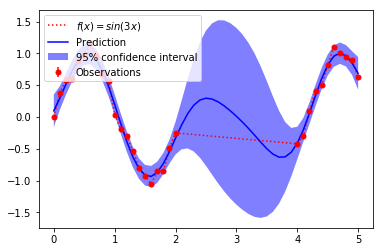

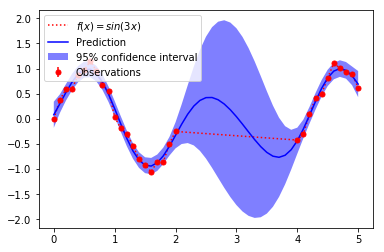

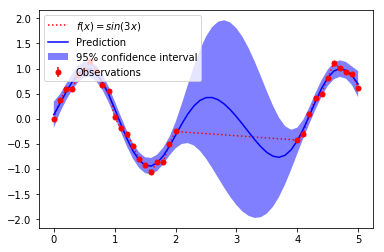

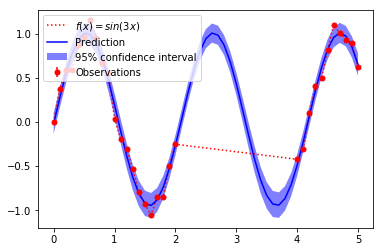

In [115]:
for i in range(0,len(y_pred)):
    plt.plot(x_train, y_train, 'r:', label=r'$f(x) = sin(3x)$')
    plt.errorbar(x_train.ravel(), y_train, 0, fmt='r.', markersize=10, label='Observations')
    plt.plot(x_test, y_pred[i], 'b-', label='Prediction')
    plt.fill(np.concatenate([x_test, x_test[::-1]]),
                 np.concatenate([y_pred[i] - 1.95 * sigma[i],
                                (y_pred[i] + 1.95 * sigma[i])[::-1]]),
                 alpha=.5, fc='b', ec='None', label='95% confidence interval')
    plt.legend(loc='upper left')
    plt.show()

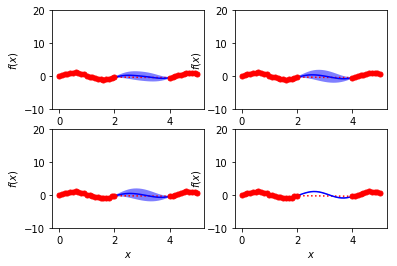

In [67]:
f, axs = plt.subplots(2,2)
for ndx, gp, ax in zip([1,2,3,4], GP, [[0,0],[0,1],[1,0],[1,1]]):
    y_pred, sigma = gp.predict(x_test, return_std=True)
    axs[ax[0],ax[1]].plot(x_train, y_train, 'r:', label=r'$f(x) = sin(3x)$')
    axs[ax[0],ax[1]].errorbar(x_train.ravel(), y_train,0, fmt='r.', markersize=10, label='Observations')
    axs[ax[0],ax[1]].plot(x_test, y_pred, 'b-', label='Prediction')
    axs[ax[0],ax[1]].fill(np.concatenate([x_test, x_test[::-1]]),
             np.concatenate([y_pred - 1.95 * sigma,
                            (y_pred + 1.95 * sigma)[::-1]]),
             alpha=.5, fc='b', ec='None', label='95% confidence interval')
    axs[ax[0],ax[1]].set_xlabel('$x$')
    axs[ax[0],ax[1]].set_ylabel('$f(x)$')
    axs[ax[0],ax[1]].set_ylim(-10, 20)
    #axs[ax[0],ax[1]].legend(loc='upper left')